<a href="https://colab.research.google.com/github/vincent0965/Colab_note/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
# ((train picture, train ans.), (test picture, tesyt ans.))
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,15,13,24,128,139,159,222,138,76,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,110,219,211,252,210,207,214,252,252,64,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,253,252,170,69,6,0,78,252,252,22,0,0,0,0,0,0,0,0,0


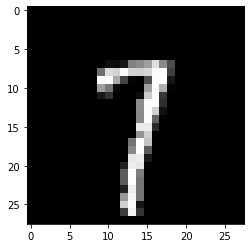

In [ ]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
          # 28 * 28 = 784
          # 784 * 128 +128 = 100480
          Dense(128, activation="relu", input_dim = 784),
          # 128 * 10 = 1280 , 1280+10(bias)=1290
          Dense(10, activation="softmax")

]
model = Sequential(layers)
# param => layer 1 to layer 2 in all link and add bias number of layer 2
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# x:scaling 0-255 => 0-1 farme is random
# y:one-hot encoding 10 Ans.
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0], y_train_cat[0])
# x_train_norm[0]

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# binary cross entropy: p*log(1/q) + (1-p)*log(1/(1-q))
# categorical cross entropy: p1 * log(1/q1) + ...
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=["accuracy"])

In [ ]:
# batch: 100~200(small picture) 10~20(large picture)
# epoch: how many adjustment with data
# 60000data, 2epoch, 200batch =>60000*2/200 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
      ModelCheckpoint("model.h5", save_best_only=True),
      EarlyStopping(patience=5, restore_best_weights=True)
      ]

model.fit(x_train_norm, y_train_cat, batch_size=100, epochs=20, validation_split=0.1, callbacks = callbacks, verbose=2)
# validation_split=
# verbose => cancel bar figure

Epoch 1/20
540/540 - 2s - loss: 0.3545 - accuracy: 0.9022 - val_loss: 0.1652 - val_accuracy: 0.9522
Epoch 2/20
540/540 - 1s - loss: 0.1625 - accuracy: 0.9533 - val_loss: 0.1124 - val_accuracy: 0.9693
Epoch 3/20
540/540 - 1s - loss: 0.1129 - accuracy: 0.9678 - val_loss: 0.0946 - val_accuracy: 0.9732
Epoch 4/20
540/540 - 1s - loss: 0.0869 - accuracy: 0.9749 - val_loss: 0.0922 - val_accuracy: 0.9737
Epoch 5/20
540/540 - 1s - loss: 0.0691 - accuracy: 0.9796 - val_loss: 0.0759 - val_accuracy: 0.9780
Epoch 6/20
540/540 - 2s - loss: 0.0560 - accuracy: 0.9839 - val_loss: 0.0750 - val_accuracy: 0.9787
Epoch 7/20
540/540 - 2s - loss: 0.0455 - accuracy: 0.9867 - val_loss: 0.0744 - val_accuracy: 0.9790
Epoch 8/20
540/540 - 2s - loss: 0.0382 - accuracy: 0.9888 - val_loss: 0.0770 - val_accuracy: 0.9778
Epoch 9/20
540/540 - 2s - loss: 0.0332 - accuracy: 0.9908 - val_loss: 0.0741 - val_accuracy: 0.9788
Epoch 10/20
540/540 - 2s - loss: 0.0269 - accuracy: 0.9929 - val_loss: 0.0739 - val_accuracy: 0.9787

540/540 - 
=> batch_size=100 => 60000/100 = 600；validation_split=0.1 => 600 * 0.1 = 60(keep data), train 540 data
1s - 
loss: 0.1611 - full down
accuracy: 0.9535 - full up(correct rate)
val_loss: 0.1187 - (loss function)
=> use ModelCheckpoint & EarlyStopping function model 
val_accuracy: 0.9668 
<tensorflow.python.keras.callbacks.History at 0x7f1d75828f60>

In [ ]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.9785


[0.0708450973033905, 0.9785000085830688]

In [ ]:
# 手動儲存: model.save("model.h5")
# if not os.path.exists("model.h5"):
#     newmodel/compile
# else:
#   load_model("model.h5")
from tensorflow.keras.models import load_model
load = load_model("model.h5")
# not compile, still fit
load.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.9785


[0.0708450973033905, 0.9785000085830688]

In [ ]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(
    mat, 
    index=["{}(正確)".format(n) for n in range(10)],
    columns=["{}(預測)".format(n) for n in range(10)]
    )

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),970,1,2,0,0,0,3,1,2,1
1(正確),0,1124,3,1,0,2,2,1,2,0
2(正確),4,3,1007,7,0,0,3,5,3,0
3(正確),0,0,2,994,0,4,1,3,3,3
4(正確),4,0,4,2,952,1,2,4,2,11
5(正確),2,0,0,9,1,875,2,1,1,1
6(正確),4,3,1,1,3,5,936,1,4,0
7(正確),1,2,9,3,1,0,0,1004,4,4
8(正確),6,0,1,6,5,4,1,2,946,3
9(正確),3,4,0,7,8,1,0,4,5,977
